<a href="https://colab.research.google.com/github/PriyanshiSharmasrm/Analytics-webscraping-and-trends-/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving election_results_2024.csv to election_results_2024 (6).csv
dict_keys(['election_results_2024 (6).csv'])
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Constituency        543 non-null    object
 1   Const. No.          543 non-null    int64 
 2   Leading Candidate   543 non-null    object
 3   Leading Party       543 non-null    object
 4   Trailing Candidate  542 non-null    object
 5   Trailing Party      542 non-null    object
 6   Margin              543 non-null    object
 7   Status              543 non-null    object
dtypes: int64(1), object(7)
memory usage: 34.1+ KB


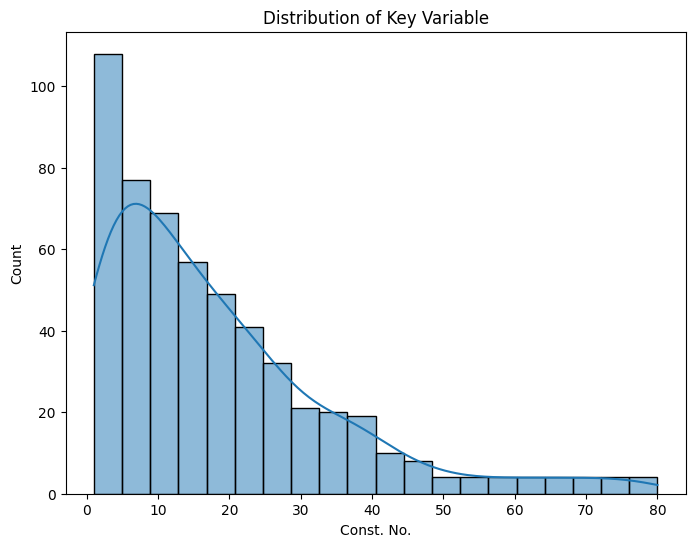

Key insights generated and saved.


In [15]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

# Upload CSV file
uploaded = files.upload()

# Print out the keys to verify the exact filename/key
print(uploaded.keys())

# Assuming the uploaded file name is 'election_results_2024.csv'
import io
# Adjust the filename to match the exact key from the uploaded dictionary
file_key = next(iter(uploaded))  # Get the first (and presumably only) key from uploaded dictionary
df = pd.read_csv(io.BytesIO(uploaded[file_key]))

# Function to generate key insights
def generate_key_insights(df):
    insights = []

    # 1. Overview of the dataset
    num_records = len(df)
    num_features = len(df.columns)
    insights.append(f"Number of records: {num_records}")
    insights.append(f"Number of features: {num_features}")

    # 2. Summary statistics (for numeric columns only)
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    summary_stats = df[numeric_cols].describe()
    insights.append("\nSummary Statistics:")
    insights.append(summary_stats.to_string())

    # 3. Data types and missing values
    data_info = df.info()
    insights.append("\nData Types and Missing Values:")
    insights.append(str(data_info))

    # 4. Correlation analysis (for numeric columns only)
    if len(numeric_cols) > 1:
        correlation_matrix = df[numeric_cols].corr()
        insights.append("\nCorrelation Matrix:")
        insights.append(correlation_matrix.to_string())

        # Visualize correlation matrix
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Matrix')
        plt.savefig('correlation_matrix.png')  # Save the plot
        plt.show()

    # 5. Distribution of key variables (example with first numeric column)
    if len(numeric_cols) > 0:
        variable_distribution = df[numeric_cols[0]].value_counts()
        insights.append("\nDistribution of Key Variable:")
        insights.append(variable_distribution.to_string())

        # Visualize distribution
        plt.figure(figsize=(8, 6))
        sns.histplot(df[numeric_cols[0]], kde=True, bins=20)
        plt.title('Distribution of Key Variable')
        plt.savefig('key_variable_distribution.png')  # Save the plot
        plt.show()

    # 6. Outlier detection (example with numeric columns)
    outliers = {}
    for col in numeric_cols:
        try:
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        except TypeError as e:
            insights.append(f"Error processing outliers for column '{col}': {e}")

    insights.append("\nOutliers:")
    insights.append(str(outliers))

    # 7. Vote Distribution by Party (if applicable)
    if 'Party' in df.columns:
        party_votes = df['Party'].value_counts()
        plt.figure(figsize=(12, 8))
        party_votes.plot(kind='bar', color='skyblue')
        plt.title('Vote Distribution by Party')
        plt.xlabel('Party')
        plt.ylabel('Number of Votes')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig('vote_distribution_by_party.png')  # Save the plot
        plt.show()
    else:
        insights.append("\nNo 'Party' column found for vote distribution by party.")

    # 8. Geographical Analysis (if applicable, e.g., constituency-wise results)
    # Example: Plotting data on a map (requires geographic data and appropriate libraries)

    # 9. Time Series Analysis (if applicable, e.g., election dates)
    # Example: Plotting trends over time (requires timestamp data and appropriate visualization)

    # 10. Demographic Insights (if applicable)
    # Example: Analyzing voting patterns across different demographics

    # Save insights to a file
    with open('key_insights.txt', 'w') as f:
        f.write("\n".join(insights))

    print("Key insights generated and saved.")

# Generate key insights for the uploaded dataset
generate_key_insights(df)
